<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI/blob/main/ProyectoML/EvolutivoLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1261]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [1262]:
#a)
C = np.array([8.51,10.68,12.24,13.66,15.37,17.15,19.66,24.69])
#b)
G = lambda w, C: min(1000000*(w*C - 1))


In [1263]:
def GetF(G,r,C):
    return G(r,C)

In [1264]:
def Metric(G,r,C):
    return G(r,C)

In [1265]:
#c)
class Robot:
    def __init__(self,f,R,C,Id=0,rate=0.01):

        self.Id = Id
        # Mutation Rate
        self.rate = rate
        self.Fitness = -np.inf
        #Función de retorno y vector de cuotas
        self.R = R
        self.C = C
        # Metrica a minimizar
        self.f = f

        # Espacio de parámetros
        self.r = np.random.uniform(0.,1., size=self.C.shape[0]) #d)
        self.r = self.r / np.sum(self.r) 

    def Mutate(self):
        #e)
        self.r += np.random.normal(loc=0., scale=self.rate, size=self.C.shape[0])
        self.r = np.abs(self.r)
        self.r = self.r / np.sum(self.r)

    def GetR(self): #Get posición Robot
        return self.r

    def SetFitness(self):
        self.Fitness = self.f(self.R,self.GetR(),self.C)

        # Fine tunning
        if self.Fitness > 500000:
            self.rate = 0.005


    def GetFitness(self):
        return self.Fitness

In [1266]:
def GetRobots(N):

    Robots = []

    for i in range(N):
        r = Robot(Metric,R=G,C=C,Id=i)
        Robots.append(r)

    return Robots

In [1267]:
def Plotter(e):

    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(122)

    return ax1

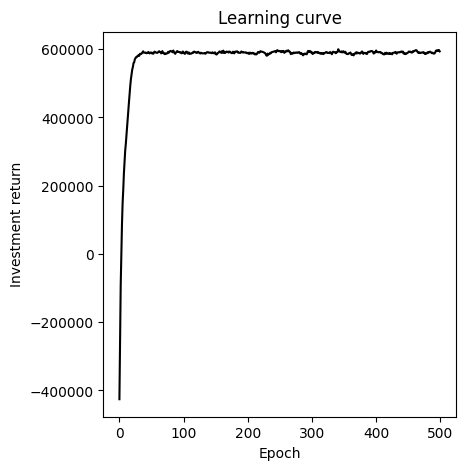

array([0.20115325, 0.15959388, 0.1397517 , 0.13065171, 0.11373418,
       0.10012571, 0.0848868 , 0.07010278])

In [1268]:
#f)
def GetF(G,r,C):
    return G(r,C)

def Metric(G,r,C):
    return G(r,C)

def GetRobots(N):
    Robots = []
    for i in range(N):
        r = Robot(Metric,R=G,C=C,Id=i)
        Robots.append(r)
    return Robots

def Plotter(e):
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(122)
    return ax1

def Genetic(Robots, epochs = 500):
    N = int(0.5*len(Robots))
    Fitness = np.array([])
    for e in range(int(epochs)):
        for i,p in enumerate(Robots):
            p.Mutate()
            p.SetFitness()
        scores = [ (p.Fitness, p) for p in Robots ]
        scores.sort(key = lambda x: x[0], reverse = True)
        Temp = [r[1] for i,r in enumerate(scores) if i < N ]
        for i,r in enumerate(Robots):
            j = i%N
            Robots[i] = copy.deepcopy(Temp[j])
        Fitness_ = [r.GetFitness() for i,r in enumerate(Robots)]
        Fitness = np.append(Fitness,np.mean(Fitness_))
        best_robot = max(Robots, key=lambda r: r.GetFitness())
        
    ax1 = Plotter(e)
    ax1.set_title('Learning curve')
    ax1.plot(Fitness,color='k')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Investment return')
    plt.show()
    return best_robot.GetR()

Robots = GetRobots(500)
w = Genetic(Robots)
w

In [1269]:
#g)
Inversion = (np.round(1000000*w))
for i in range(len(Inversion)):
    print(f"Hay que invertir {Inversion[i]+1} en la opción {i+1}")


Hay que invertir 201154.0 en la opción 1
Hay que invertir 159595.0 en la opción 2
Hay que invertir 139753.0 en la opción 3
Hay que invertir 130653.0 en la opción 4
Hay que invertir 113735.0 en la opción 5
Hay que invertir 100127.0 en la opción 6
Hay que invertir 84888.0 en la opción 7
Hay que invertir 70104.0 en la opción 8


In [1270]:
Gmax = lambda w, C: max(1000000*(w*C - 1))
print(f"El retorno minimo posible con la ponderación w es {round(G(w,C))}")
print(f"El retorno maximo posible con la ponderación w es {round(Gmax(w,C))}")
#Efectivamente, hay ganancia de dinero en cualquier escenario.

El retorno minimo posible con la ponderación w es 668874
El retorno maximo posible con la ponderación w es 784702
